# Popular 10000 movies listed on TMDb

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [2]:
cast_df = pd.read_csv('../data/popular_10000_movies/cast_dataset.csv', index_col='id')
crew_df = pd.read_csv('../data/popular_10000_movies/crew_dataset.csv', index_col='id')
keywords_df = pd.read_csv('../data/popular_10000_movies/keywords_dataframe.csv', index_col='id')
mov_df = pd.read_csv('../data/popular_10000_movies/movies_dataset.csv', index_col='id')

keywords_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
movies_df = mov_df.merge(cast_df, on='id').merge(crew_df, on ='id').merge(keywords_df, on ='id')
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [4]:
movies_df.head()

,genre_ids,original_language,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,,
385687,"[28, 80, 53]",en,Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",en,Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]",en,"With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]",en,"While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."


In [5]:
movies_df.shape

(10652, 12)

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10652 entries, 385687 to 465109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          10652 non-null  object        
 1   original_language  10652 non-null  object        
 2   overview           10649 non-null  object        
 3   popularity         10652 non-null  float64       
 4   release_date       10636 non-null  datetime64[ns]
 5   title              10652 non-null  object        
 6   vote_average       10652 non-null  float64       
 7   vote_count         10652 non-null  int64         
 8   genres             10634 non-null  object        
 9   cast               10652 non-null  object        
 10  crew               10652 non-null  object        
 11  keywords           10652 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 749.0+ KB


## Data cleaning

In [7]:
movies_df['original_language'].value_counts()

en    10652
Name: original_language, dtype: int64

In [8]:
movies_df.drop('original_language', axis=1, inplace=True)

In [9]:
no_keywords_ids = movies_df[movies_df['keywords']=='[]'].index
duplicated = movies_df[movies_df.duplicated(['overview'])].index

In [10]:
no_keywords_ids

Int64Index([1074034, 1115710, 1073140, 1094319, 1016121,  893345,  993867,
            1070777,   44918, 1129956,
            ...
             767499,  430682,   37527,  718100,   54648,  538604,  560362,
             987337,  653746,  583081],
           dtype='int64', name='id', length=782)

In [11]:
np.intersect1d(no_keywords_ids, duplicated)

array([144204, 538207, 661286, 724989, 892153], dtype=int64)

In [12]:
movies_df.drop_duplicates(['overview'], inplace=True)

In [13]:
movies_df.drop(movies_df[movies_df['keywords']=='[]'].index, axis=0, inplace=True)

In [14]:
movies_df.isnull().sum()

genre_ids        0
overview         0
popularity       0
release_date    10
title            0
vote_average     0
vote_count       0
genres           2
cast             0
crew             0
keywords         0
dtype: int64

In [15]:
movies_df.dropna(axis=0, inplace=True)

In [16]:
movies_df

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."
...,...,...,...,...,...,...,...,...,...,...,...
15017,"[35, 10749]",A young professional woman (Simpson) unwitting...,11.077,2007-12-21,Blonde Ambition,4.6,97,"Comedy, Romance","[{'cast_id': 52052, 'name': 'Jessica Simpson',...","[{'crew_id': 7413, 'name': 'Mark Irwin', 'depa...","[{'id': 6593, 'name': 'stripper'}, {'id': 9713..."
79509,"[28, 53, 35]",Josh meets a young woman who shortly afterward...,11.076,1990-03-22,The Ambulance,5.9,85,"Action, Thriller, Comedy","[{'cast_id': 21315, 'name': 'Eric Roberts', 'c...","[{'crew_id': 13670, 'name': 'Jacques Haitkin',...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
13370,"[35, 10402]",Director Christopher Guest reunites the team f...,11.075,2003-04-16,A Mighty Wind,6.8,206,"Comedy, Music","[{'cast_id': 12438, 'name': 'Bob Balaban', 'ch...","[{'crew_id': 3032, 'name': 'Robert Leighton', ...","[{'id': 11800, 'name': 'mockumentary'}, {'id':..."


In [20]:
keywords_df.drop(keywords_df[keywords_df['keywords']=='[]'].index, axis=0, inplace=True)

In [56]:
keyword_l = keywords_df.loc[640146]

In [60]:
keyword_l[0]

"[{'id': 1701, 'name': 'hero'}, {'id': 3126, 'name': 'ant'}, {'id': 9663, 'name': 'sequel'}, {'id': 9715, 'name': 'superhero'}, {'id': 9717, 'name': 'based on comic'}, {'id': 18035, 'name': 'family'}, {'id': 155030, 'name': 'superhero team'}, {'id': 179430, 'name': 'aftercreditsstinger'}, {'id': 179431, 'name': 'duringcreditsstinger'}, {'id': 180547, 'name': 'marvel cinematic universe (mcu)'}]"

In [87]:
movies_df.drop(movies_df[movies_df['vote_average']==0].index, axis=0, inplace=True)

## EDA

In [91]:
movies_df.groupby('genres').mean().sort_values(['vote_average'], ascending=False)

,popularity,vote_average,vote_count
genres,,,
"Family, Comedy, Mystery, Animation",10.122,8.6,82.0
"Adventure, Animation, Comedy, Fantasy, Mystery",12.090,8.5,21.0
"Fantasy, Drama, Crime",69.123,8.5,15537.0
"Animation, Family, Fantasy, Adventure, Comedy",502.086,8.3,5832.0
"Family, Animation, Drama",97.326,8.3,16649.0
...,...,...,...
"Horror, Action, Comedy, Science Fiction, Adventure",11.146,3.9,1436.0
"Fantasy, Science Fiction, Family, TV Movie",15.379,3.3,408.0
"Science Fiction, Horror, Action, Thriller",13.295,2.9,117.0


In [97]:
movies_df.groupby('genres').count().sort_values(['vote_average'], ascending=False).head(20)

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,keywords
genres,,,,,,,,,,
Drama,447,447,447,447,447,447,447,447,447,447
Comedy,375,375,375,375,375,375,375,375,375,375
"Comedy, Romance",231,231,231,231,231,231,231,231,231,231
"Drama, Romance",228,228,228,228,228,228,228,228,228,228
"Horror, Thriller",190,190,190,190,190,190,190,190,190,190
"Comedy, Drama",183,183,183,183,183,183,183,183,183,183
Horror,165,165,165,165,165,165,165,165,165,165
"Comedy, Drama, Romance",151,151,151,151,151,151,151,151,151,151
"Drama, Thriller",107,107,107,107,107,107,107,107,107,107


In [99]:
movies_df.groupby('genres').count().sort_values(['vote_average'], ascending=False).head(20).index

Index(['Drama', 'Comedy', 'Comedy, Romance', 'Drama, Romance',
       'Horror, Thriller', 'Comedy, Drama', 'Horror', 'Comedy, Drama, Romance',
       'Drama, Thriller', 'Drama, History', 'Action, Thriller', 'Documentary',
       'Crime, Drama, Thriller', 'Romance, Comedy', 'Action, Crime, Thriller',
       'Comedy, Crime', 'Thriller', 'Crime, Drama',
       'Horror, Mystery, Thriller', 'Romance, Drama'],
      dtype='object', name='genres')

In [98]:
movies_df.groupby('genres').count().sort_values(['vote_average'], ascending=False).tail(20)

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,keywords
genres,,,,,,,,,,
"Drama, Fantasy, Horror, Mystery",1,1,1,1,1,1,1,1,1,1
"Action, Western",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Family",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Comedy, TV Movie",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Comedy",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Adventure",1,1,1,1,1,1,1,1,1,1
"Drama, Family, Western",1,1,1,1,1,1,1,1,1,1
"Drama, Family, TV Movie, Comedy",1,1,1,1,1,1,1,1,1,1
"Drama, Family, TV Movie",1,1,1,1,1,1,1,1,1,1


## Visualization

<AxesSubplot:xlabel='popularity', ylabel='title'>

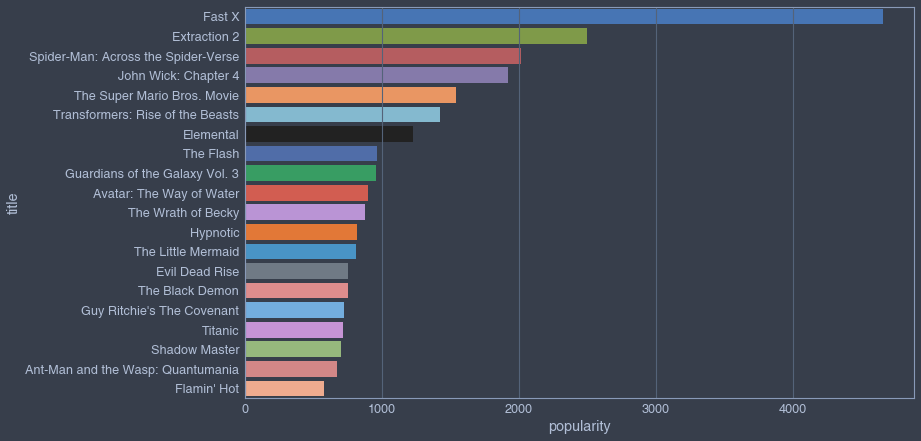

In [47]:
top_popularity = movies_df.sort_values(['popularity'], ascending=False).head(20)
sns.barplot(data=top_popularity, x='popularity', y='title')

<AxesSubplot:xlabel='popularity', ylabel='title'>

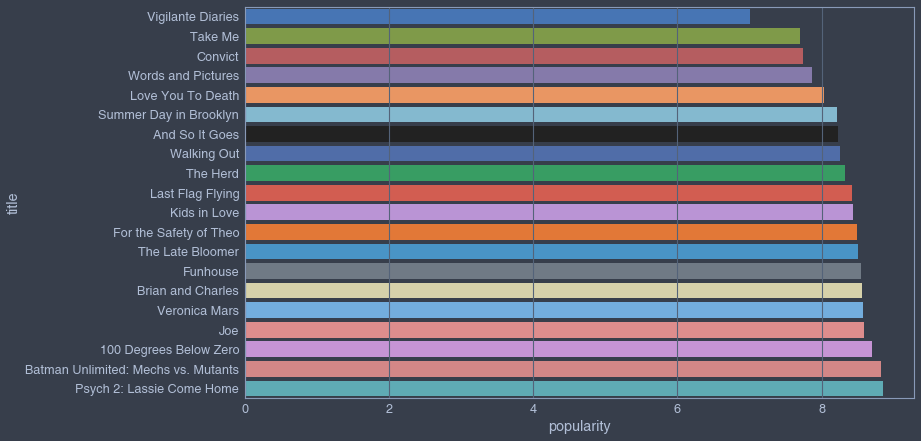

In [72]:
bottom_popularity = movies_df[movies_df['popularity']!=0].sort_values(['popularity'], ascending=True).head(20)
sns.barplot(data=bottom_popularity, x='popularity', y='title')

<AxesSubplot:xlabel='vote_average', ylabel='title'>

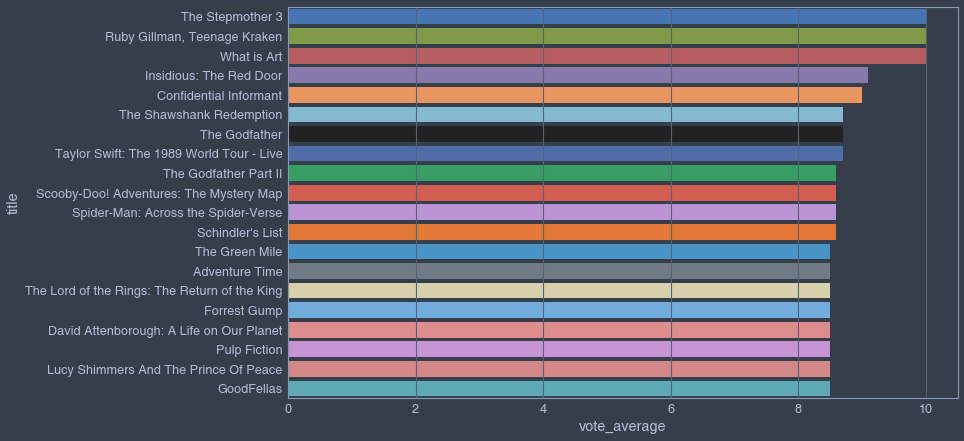

In [66]:
top_vote = movies_df.sort_values(['vote_average'], ascending=False).head(20)
sns.barplot(data=top_vote, x='vote_average', y='title')

<AxesSubplot:xlabel='vote_average', ylabel='title'>

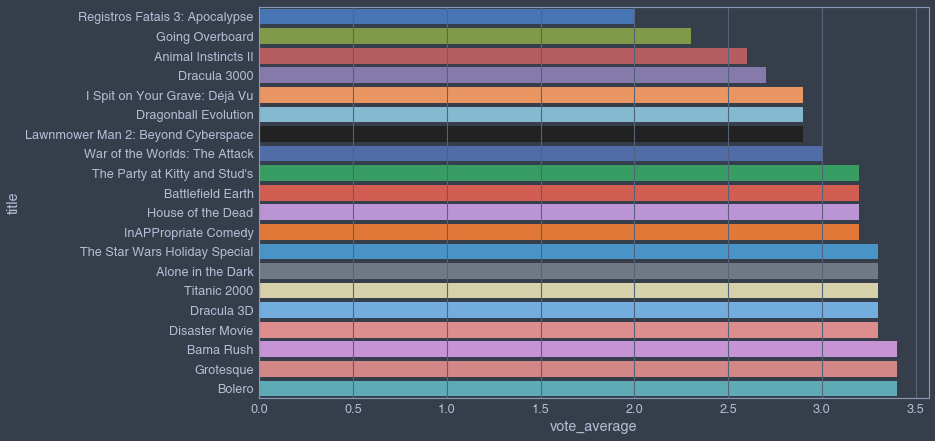

In [69]:
bottom_vote = movies_df[movies_df['vote_average']!=0].sort_values(['vote_average'], ascending=True).head(20)
sns.barplot(data=bottom_vote, x='vote_average', y='title')

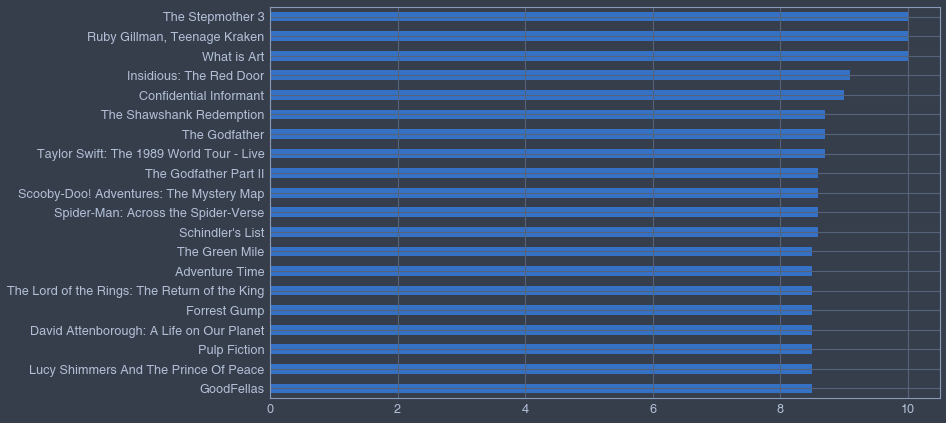

In [49]:
top_vote_2 = pd.Series(top_vote['vote_average'].to_list(), index=top_vote['title'].to_list()) 
top_vote_2.plot(kind='barh').invert_yaxis()

In [63]:
movies_df

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."
...,...,...,...,...,...,...,...,...,...,...,...
15017,"[35, 10749]",A young professional woman (Simpson) unwitting...,11.077,2007-12-21,Blonde Ambition,4.6,97,"Comedy, Romance","[{'cast_id': 52052, 'name': 'Jessica Simpson',...","[{'crew_id': 7413, 'name': 'Mark Irwin', 'depa...","[{'id': 6593, 'name': 'stripper'}, {'id': 9713..."
79509,"[28, 53, 35]",Josh meets a young woman who shortly afterward...,11.076,1990-03-22,The Ambulance,5.9,85,"Action, Thriller, Comedy","[{'cast_id': 21315, 'name': 'Eric Roberts', 'c...","[{'crew_id': 13670, 'name': 'Jacques Haitkin',...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
13370,"[35, 10402]",Director Christopher Guest reunites the team f...,11.075,2003-04-16,A Mighty Wind,6.8,206,"Comedy, Music","[{'cast_id': 12438, 'name': 'Bob Balaban', 'ch...","[{'crew_id': 3032, 'name': 'Robert Leighton', ...","[{'id': 11800, 'name': 'mockumentary'}, {'id':..."


Text(0, 0.5, 'Popularity')

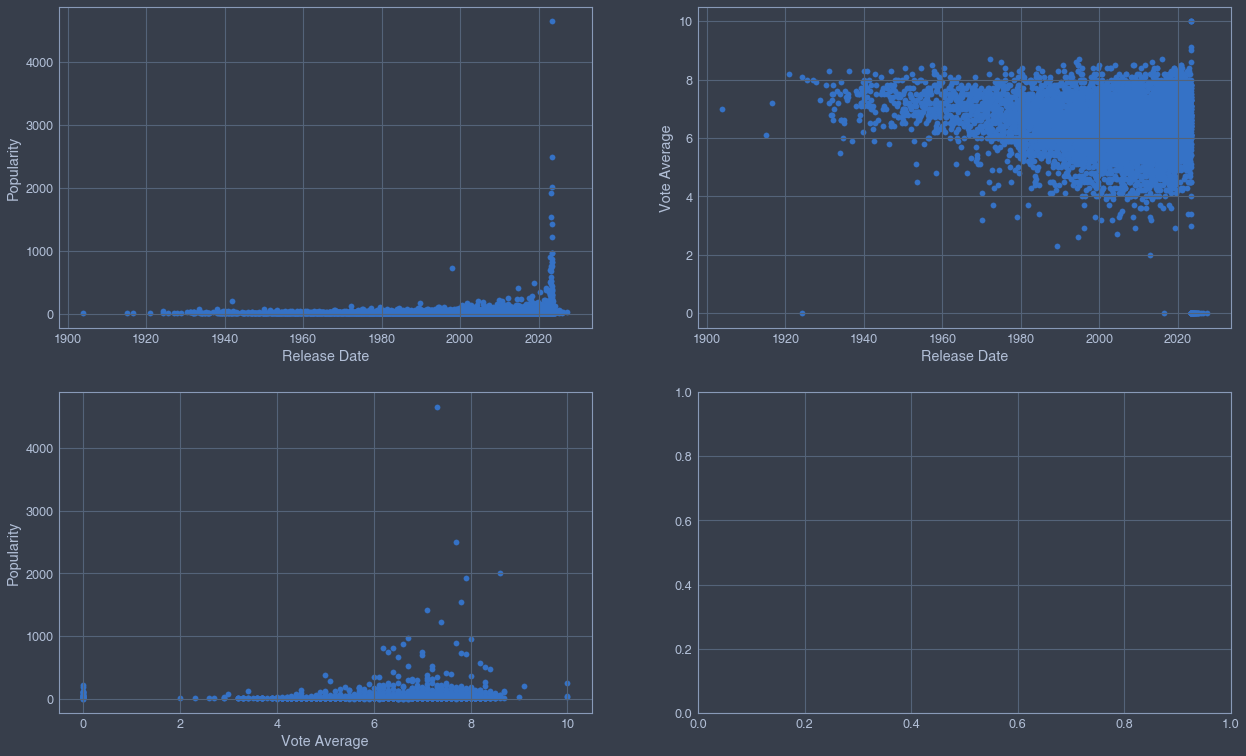

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(21, 13))

axs[0, 0].scatter(movies_df['release_date'], movies_df['popularity'])
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Popularity')

axs[0, 1].scatter(movies_df['release_date'], movies_df['vote_average'])
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Vote Average')

axs[1, 0].scatter(movies_df['vote_average'], movies_df['popularity'])
axs[1, 0].set_xlabel('Vote Average')
axs[1, 0].set_ylabel('Popularity')

In [51]:
movies_df.groupby('release_date')['genres'].value_counts()

release_date  genres                            
1903-12-07    Crime, Action, Western                1
1915-02-08    Drama, History, War                   1
1916-09-04    Drama, History                        1
1921-01-21    Comedy, Drama                         1
1924-04-17    Action, Comedy, Mystery               1
                                                   ..
2025-04-04    Action, Crime, Thriller               1
2025-06-27    Adventure, Comedy, Family, Fantasy    1
2025-12-17    Action, Science Fiction, Adventure    1
2026-04-29    Action, Science Fiction, Adventure    1
2027-05-05    Action, Science Fiction               1
Name: genres, Length: 9143, dtype: int64

In [52]:
genres_by_date = movies_df.groupby('release_date')['genres'].value_counts()

In [53]:
genres_by_date = genres_by_date.to_frame()

In [54]:
genres_by_date = genres_by_date.rename(columns={'genres': 'genres_count'})

In [55]:
genres_by_date.reset_index(inplace=True)
genres_by_date

,release_date,genres,genres_count
0,1903-12-07,"Crime, Action, Western",1
1,1915-02-08,"Drama, History, War",1
2,1916-09-04,"Drama, History",1
3,1921-01-21,"Comedy, Drama",1
4,1924-04-17,"Action, Comedy, Mystery",1
...,...,...,...
9138,2025-04-04,"Action, Crime, Thriller",1
9139,2025-06-27,"Adventure, Comedy, Family, Fantasy",1
9140,2025-12-17,"Action, Science Fiction, Adventure",1
9141,2026-04-29,"Action, Science Fiction, Adventure",1


In [56]:
most_pop = movies_df[['release_date', 'title']]
most_pop.reset_index(inplace=True)
most_pop.drop('id', axis=1, inplace=True)

f:\python\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
most_pop.set_index(['release_date'], inplace=True)

In [58]:
most_pop.loc['2020-1-1':'2021-1-1']

,title
release_date,
2020-04-24,Extraction
2020-09-02,After We Collided
2020-04-12,Mortal Kombat Legends: Scorpion's Revenge
2020-02-19,The Call of the Wild
2020-08-26,Making The Witcher
...,...
2020-10-15,Stay Out of the Attic
2020-09-24,Two by Two: Overboard!
2020-11-13,Too Close for Christmas


Text(0, 0.5, 'Unpopular Genres')

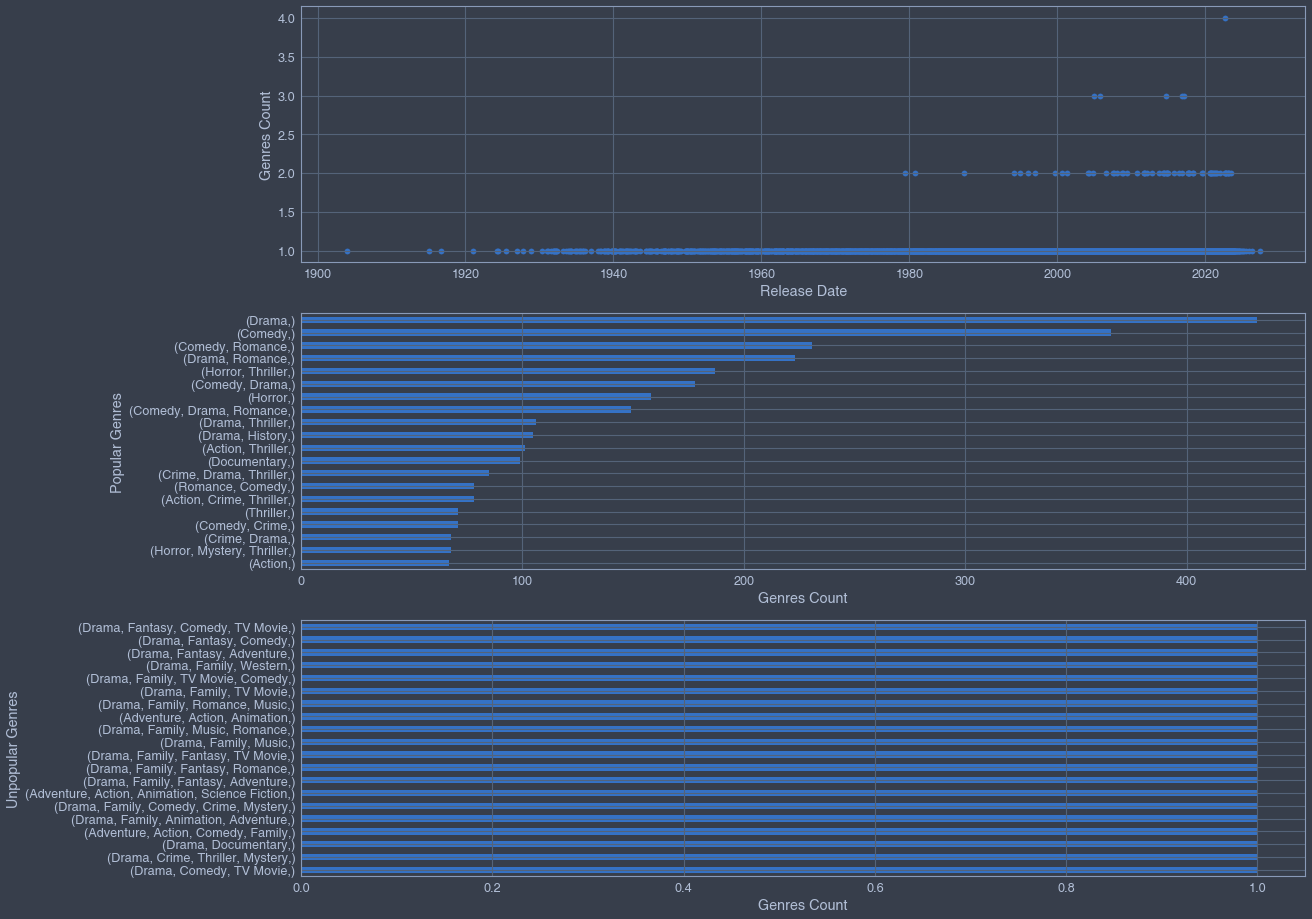

In [69]:
fig, axs = plt.subplots(3, 1, figsize=(18, 16))

axs[0].scatter(genres_by_date['release_date'], genres_by_date['genres_count'])
axs[0].set_xlabel('Release Date')
axs[0].set_ylabel('Genres Count')

genres_by_date.value_counts(['genres']).head(20).plot(kind='barh', x='genres', y='count', ax=axs[1]).invert_yaxis()
axs[1].set_xlabel('Genres Count')
axs[1].set_ylabel('Popular Genres')

genres_by_date.value_counts(['genres']).tail(20).plot(kind='barh', x='genres', y='count', ax=axs[2]).invert_yaxis()
axs[2].set_xlabel('Genres Count')
axs[2].set_ylabel('Unpopular Genres')

In [60]:
genres_by_date[genres_by_date['genres']=='Horror']

,release_date,genres,genres_count
251,1958-05-22,Horror,1
333,1963-03-28,Horror,1
344,1963-08-21,Horror,1
393,1966-01-09,Horror,1
454,1968-07-20,Horror,1
...,...,...,...
8894,2023-01-02,Horror,1
8902,2023-01-13,Horror,2
8917,2023-01-27,Horror,1
9048,2023-06-09,Horror,1


In [61]:
genres_by_date

,release_date,genres,genres_count
0,1903-12-07,"Crime, Action, Western",1
1,1915-02-08,"Drama, History, War",1
2,1916-09-04,"Drama, History",1
3,1921-01-21,"Comedy, Drama",1
4,1924-04-17,"Action, Comedy, Mystery",1
...,...,...,...
9138,2025-04-04,"Action, Crime, Thriller",1
9139,2025-06-27,"Adventure, Comedy, Family, Fantasy",1
9140,2025-12-17,"Action, Science Fiction, Adventure",1
9141,2026-04-29,"Action, Science Fiction, Adventure",1


Text(0, 0.5, 'Count')

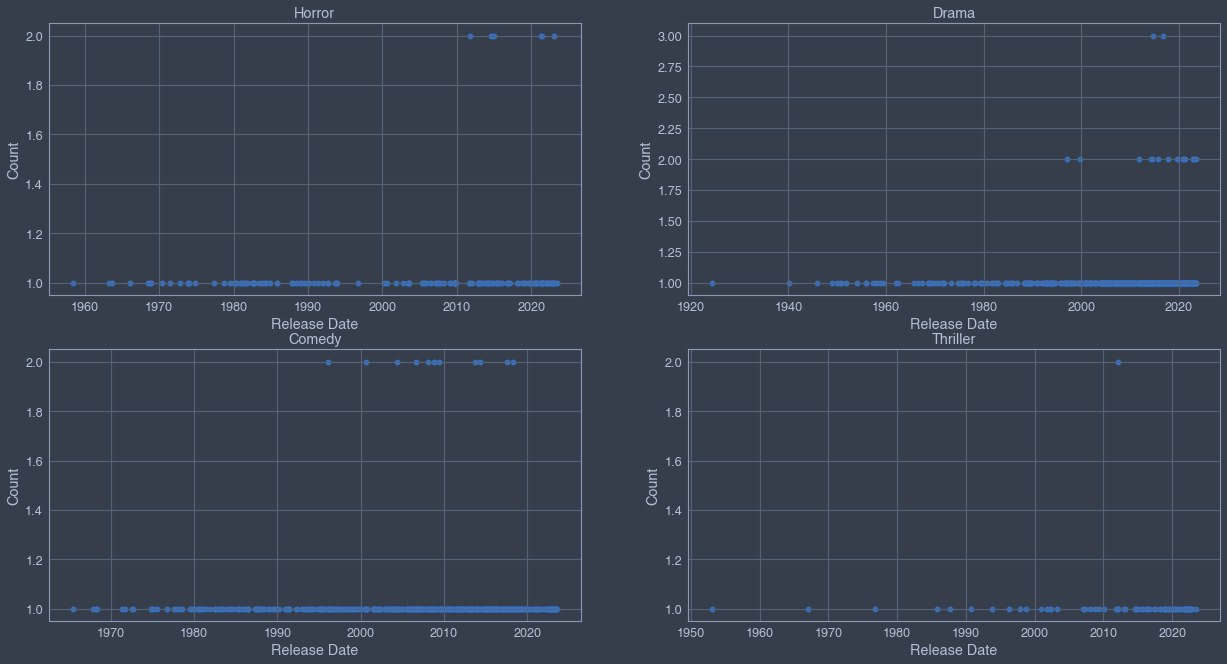

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(21, 11))

axs[0, 0].scatter(genres_by_date[genres_by_date['genres']=='Horror']['release_date'],
               genres_by_date[genres_by_date['genres']=='Horror']['genres_count'])
axs[0, 0].set_title('Horror')
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Count')

axs[0, 1].scatter(genres_by_date[genres_by_date['genres']=='Drama']['release_date'],
               genres_by_date[genres_by_date['genres']=='Drama']['genres_count'])
axs[0, 1].set_title('Drama')
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Count')

axs[1, 0].scatter(genres_by_date[genres_by_date['genres']=='Comedy']['release_date'],
               genres_by_date[genres_by_date['genres']=='Comedy']['genres_count'])
axs[1, 0].set_title('Comedy')
axs[1, 0].set_xlabel('Release Date')
axs[1, 0].set_ylabel('Count')

axs[1, 1].scatter(genres_by_date[genres_by_date['genres']=='Thriller']['release_date'],
               genres_by_date[genres_by_date['genres']=='Thriller']['genres_count'])
axs[1, 1].set_title('Thriller')
axs[1, 1].set_xlabel('Release Date')
axs[1, 1].set_ylabel('Count')

In [63]:
comedy_romance = movies_df[(movies_df['genres']=='Comedy, Romance') | (movies_df['genres']=='Romance, Comedy')]
drama_romance = movies_df[(movies_df['genres']=='Drama, Romance') | (movies_df['genres']=='Romance, Drama')]

In [23]:
comedy_romance

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
884605,"[35, 10749]","On the brink of losing her childhood home, Mad...",433.211,2023-06-15,No Hard Feelings,6.4,77,"Comedy, Romance","[{'cast_id': 72129, 'name': 'Jennifer Lawrence...","[{'crew_id': 5359, 'name': 'Mychael Danna', 'd...","[{'id': 9799, 'name': 'romantic comedy'}, {'id..."
561717,"[10749, 35]","After a high-profile firing, Jenna’s fashion c...",216.706,2023-06-23,The Perfect Find,6.4,19,"Romance, Comedy","[{'cast_id': 17773, 'name': 'Gabrielle Union',...","[{'crew_id': 17773, 'name': 'Gabrielle Union',...","[{'id': 818, 'name': 'based on novel or book'}..."
232672,"[35, 10749]",After a divorced mom and widowed dad have a di...,68.973,2014-05-21,Blended,6.9,3122,"Comedy, Romance","[{'cast_id': 19292, 'name': 'Adam Sandler', 'c...","[{'crew_id': 2593, 'name': 'Rupert Gregson-Wil...","[{'id': 409, 'name': 'africa'}, {'id': 641, 'n..."
114,"[35, 10749]",When a millionaire wheeler-dealer enters a bus...,64.533,1990-03-23,Pretty Woman,7.4,7205,"Comedy, Romance","[{'cast_id': 1205, 'name': 'Richard Gere', 'ch...","[{'crew_id': 376, 'name': 'Arnon Milchan', 'de...","[{'id': 549, 'name': 'prostitute'}, {'id': 592..."
2105,"[35, 10749]","At a high-school party, four friends find that...",56.981,1999-07-09,American Pie,6.6,7003,"Comedy, Romance","[{'cast_id': 21593, 'name': 'Jason Biggs', 'ch...","[{'crew_id': 298, 'name': 'Chris Bender', 'dep...","[{'id': 3687, 'name': 'graduation'}, {'id': 61..."
...,...,...,...,...,...,...,...,...,...,...,...
267463,"[10749, 35]",Myles and Brody are best friends with two very...,11.241,2014-09-06,The 10 Year Plan,6.8,275,"Romance, Comedy","[{'cast_id': 1525042, 'name': 'Jack Turner', '...","[{'crew_id': 36051, 'name': 'Mark Sikes', 'dep...","[{'id': 8015, 'name': 'cop'}, {'id': 10050, 'n..."
17887,"[35, 10749]","In this film based on a Neil Simon play, newly...",11.215,1967-05-25,Barefoot in the Park,7.1,518,"Comedy, Romance","[{'cast_id': 4135, 'name': 'Robert Redford', '...","[{'crew_id': 3892, 'name': 'Johnny Mercer', 'd...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
513576,"[10749, 35]","Reunited after 15 years, famous chef Sasha and...",11.150,2019-05-31,Always Be My Maybe,6.7,1224,"Romance, Comedy","[{'cast_id': 591835, 'name': 'Ali Wong', 'char...","[{'crew_id': 1589, 'name': 'Michael Andrews', ...","[{'id': 242, 'name': 'new york city'}, {'id': ..."


Text(0, 0.5, 'Vote Average')

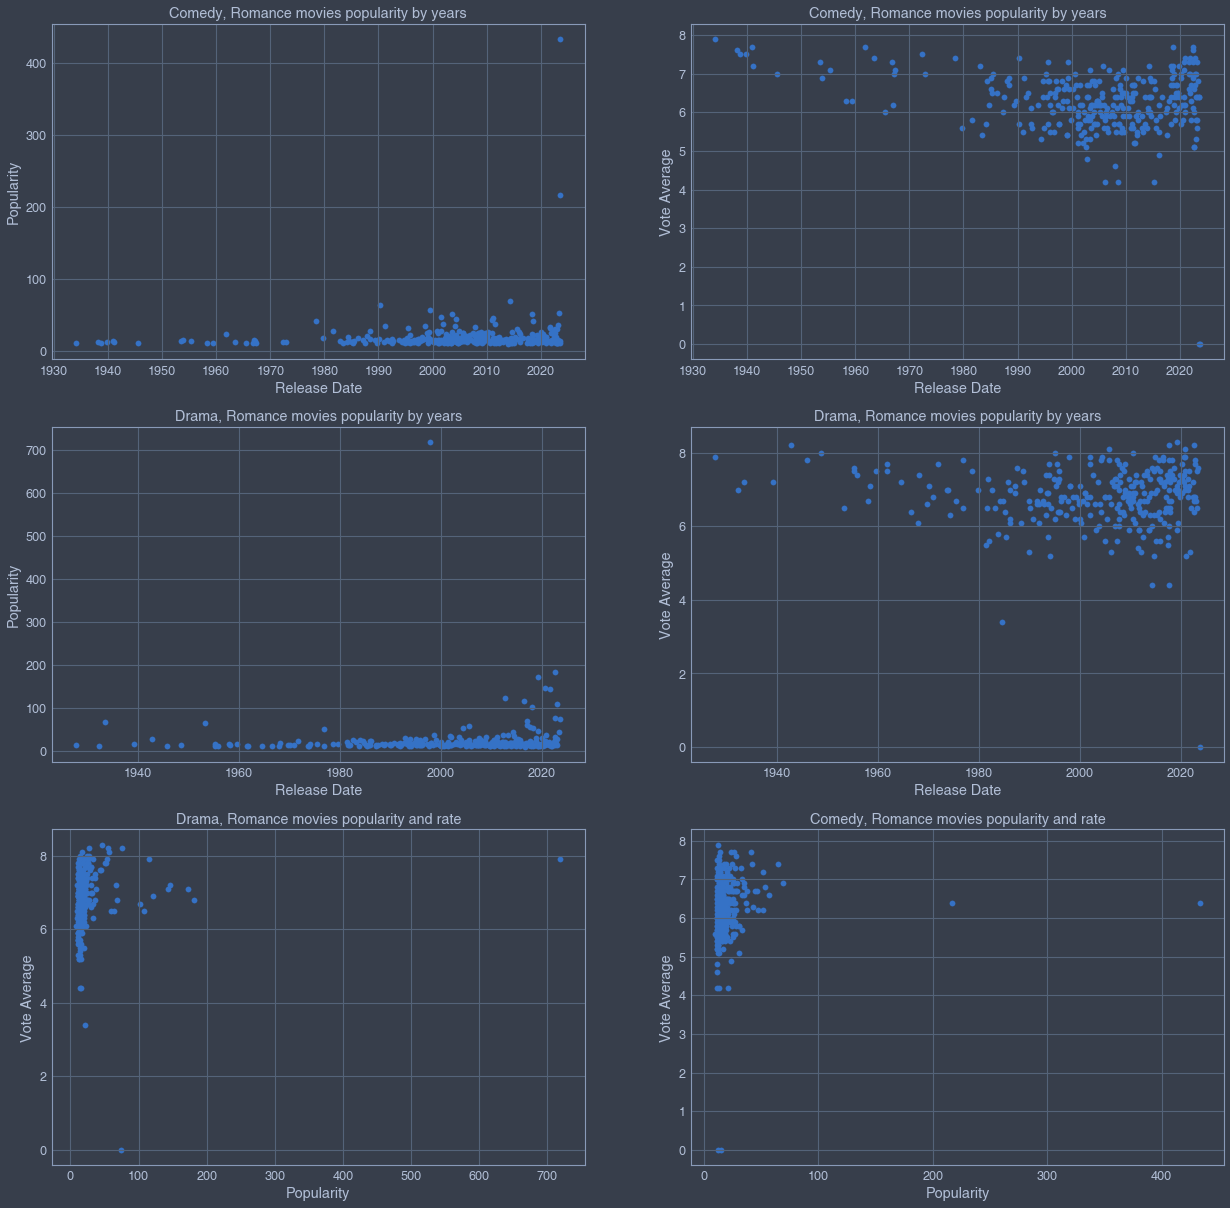

In [64]:
fig, axs = plt.subplots(3, 2, figsize=(21, 21))

axs[0, 0].scatter(comedy_romance['release_date'],
               comedy_romance['popularity'])
axs[0, 0].set_title('Comedy, Romance movies popularity by years')
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Popularity')

axs[1, 0].scatter(drama_romance['release_date'],
               drama_romance['popularity'])
axs[1, 0].set_title('Drama, Romance movies popularity by years')
axs[1, 0].set_xlabel('Release Date')
axs[1, 0].set_ylabel('Popularity')

axs[0, 1].scatter(comedy_romance['release_date'],
               comedy_romance['vote_average'])
axs[0, 1].set_title('Comedy, Romance movies popularity by years')
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Vote Average')

axs[1, 1].scatter(drama_romance['release_date'],
               drama_romance['vote_average'])
axs[1, 1].set_title('Drama, Romance movies popularity by years')
axs[1, 1].set_xlabel('Release Date')
axs[1, 1].set_ylabel('Vote Average')

axs[2, 0].scatter(drama_romance['popularity'],
               drama_romance['vote_average'])
axs[2, 0].set_title('Drama, Romance movies popularity and rate')
axs[2, 0].set_xlabel('Popularity')
axs[2, 0].set_ylabel('Vote Average')

axs[2, 1].scatter(comedy_romance['popularity'],
               comedy_romance['vote_average'])
axs[2, 1].set_title('Comedy, Romance movies popularity and rate')
axs[2, 1].set_xlabel('Popularity')
axs[2, 1].set_ylabel('Vote Average')

In [81]:
num_of_comedy_romance = comedy_romance.groupby('release_date').count()

<AxesSubplot:xlabel='release_date'>

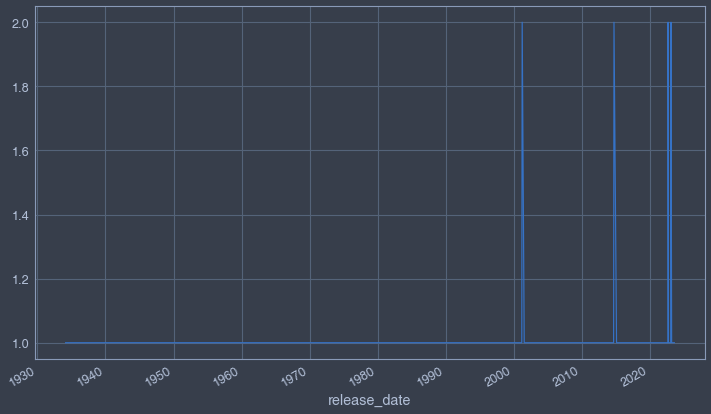

In [82]:
num_of_comedy_romance['title'].plot()

In [46]:
date_index = movies_df.copy()
date_index.reset_index(inplace=True)
# date_index.drop('id', axis=1, inplace=True)
date_index.set_index(['release_date'], inplace=True)

In [47]:
date_index

,id,genre_ids,overview,popularity,title,vote_average,vote_count,genres,cast,crew,keywords
release_date,,,,,,,,,,,
2023-05-17,385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
2023-06-09,697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
2023-03-22,603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
2023-05-31,569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
2023-04-05,502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-21,15017,"[35, 10749]",A young professional woman (Simpson) unwitting...,11.077,Blonde Ambition,4.6,97,"Comedy, Romance","[{'cast_id': 52052, 'name': 'Jessica Simpson',...","[{'crew_id': 7413, 'name': 'Mark Irwin', 'depa...","[{'id': 6593, 'name': 'stripper'}, {'id': 9713..."
1990-03-22,79509,"[28, 53, 35]",Josh meets a young woman who shortly afterward...,11.076,The Ambulance,5.9,85,"Action, Thriller, Comedy","[{'cast_id': 21315, 'name': 'Eric Roberts', 'c...","[{'crew_id': 13670, 'name': 'Jacques Haitkin',...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
2003-04-16,13370,"[35, 10402]",Director Christopher Guest reunites the team f...,11.075,A Mighty Wind,6.8,206,"Comedy, Music","[{'cast_id': 12438, 'name': 'Bob Balaban', 'ch...","[{'crew_id': 3032, 'name': 'Robert Leighton', ...","[{'id': 11800, 'name': 'mockumentary'}, {'id':..."


In [63]:
genres = date_index.groupby('genres').count()

In [66]:
genres_by_date.value_counts(['genres'])

genres                               
Drama                                    454
Comedy                                   394
Comedy, Romance                          239
Drama, Romance                           229
Horror, Thriller                         198
                                        ... 
Drama, Family, Fantasy, TV Movie           1
Drama, Family, Fantasy, Romance            1
Drama, Family, Fantasy, Adventure          1
Drama, Family, Comedy, Crime, Mystery      1
Drama, Crime, Documentary                  1
Length: 2238, dtype: int64

In [92]:
genres

,id,genre_ids,overview,popularity,title,vote_average,vote_count,cast,crew,keywords
genres,,,,,,,,,,
Action,81,81,81,81,81,81,81,81,81,81
"Action, Adventure",17,17,17,17,17,17,17,17,17,17
"Action, Adventure, Animation",3,3,3,3,3,3,3,3,3,3
"Action, Adventure, Animation, Comedy",1,1,1,1,1,1,1,1,1,1
"Action, Adventure, Animation, Comedy, Family",4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
"Western, Mystery",1,1,1,1,1,1,1,1,1,1
"Western, Mystery, Thriller, Drama",1,1,1,1,1,1,1,1,1,1
"Western, Romance",2,2,2,2,2,2,2,2,2,2


In [59]:
corr_df = movies_df[['popularity', 'vote_average', 'vote_count']]

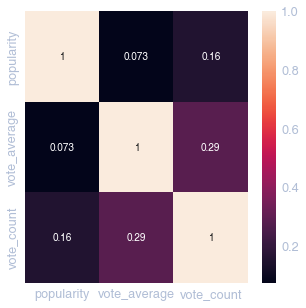

In [61]:
corr = corr_df.corr()
corr_features = corr.index
plt.figure(figsize=(5,5))
g = sns.heatmap(corr_df[corr_features].corr(), annot=True)